In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("dataset.csv")
print(data.info())


C:\Users\rocke\AppData\Local\Temp\ipykernel_22884\3984644045.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("dataset.csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 6 columns):
 #   Column             Non-Null Count    Dtype 
---  ------             --------------    ----- 
 0   TripID             1048575 non-null  int64 
 1   RouteID            1048575 non-null  object
 2   StopID             1048575 non-null  int64 
 3   StopName           1048575 non-null  object
 4   WeekBeginning      1048575 non-null  object
 5   NumberOfBoardings  1048575 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 48.0+ MB
None


In [3]:
print(data.describe())

             TripID        StopID  NumberOfBoardings
count  1.048575e+06  1.048575e+06       1.048575e+06
mean   2.860299e+04  1.330114e+04       4.132290e+00
std    1.674656e+04  1.119243e+03       6.291338e+00
min    3.017000e+03  1.081700e+04       1.000000e+00
25%    1.162200e+04  1.269800e+04       1.000000e+00
50%    3.423400e+04  1.333500e+04       2.000000e+00
75%    4.512600e+04  1.371600e+04       4.000000e+00
max    6.258500e+04  1.849300e+04       1.930000e+02


In [4]:
data.drop_duplicates(inplace=True)
print("Column headings:")
print(data.columns)

Column headings:
Index(['TripID', 'RouteID', 'StopID', 'StopName', 'WeekBeginning',
       'NumberOfBoardings'],
      dtype='object')


In [5]:
print(data.dtypes)

TripID                int64
RouteID              object
StopID                int64
StopName             object
WeekBeginning        object
NumberOfBoardings     int64
dtype: object


In [6]:
print(data['NumberOfBoardings'].head())

0    1
1    1
2    1
3    2
4    1
Name: NumberOfBoardings, dtype: int64


In [7]:
print(data['StopName'].head())

0                  181 Cross Rd
1                  177 Cross Rd
2                  175 Cross Rd
3    Zone A Arndale Interchange
4                  178 Cross Rd
Name: StopName, dtype: object


In [8]:
print("statistical Description:",data.describe())

statistical Description:              TripID        StopID  NumberOfBoardings
count  1.048575e+06  1.048575e+06       1.048575e+06
mean   2.860299e+04  1.330114e+04       4.132290e+00
std    1.674656e+04  1.119243e+03       6.291338e+00
min    3.017000e+03  1.081700e+04       1.000000e+00
25%    1.162200e+04  1.269800e+04       1.000000e+00
50%    3.423400e+04  1.333500e+04       2.000000e+00
75%    4.512600e+04  1.371600e+04       4.000000e+00
max    6.258500e+04  1.849300e+04       1.930000e+02


In [9]:
print("shape:",data.shape)

shape: (1048575, 6)


In [14]:
valid = data['WeekBeginning'].between('6/30/2013 0:00', '6/15/2014 0:00')
print(valid)

0          False
1          False
2          False
3          False
4          False
           ...  
1048570    False
1048571    False
1048572    False
1048573    False
1048574    False
Name: WeekBeginning, Length: 1048575, dtype: bool


In [20]:
correct_format = pd.to_datetime(data['WeekBeginning'], errors='coerce').notna()
print(correct_format)

0          True
1          True
2          True
3          True
4          True
           ... 
1048570    True
1048571    True
1048572    True
1048573    True
1048574    True
Name: WeekBeginning, Length: 1048575, dtype: bool


In [23]:
positive_values = data['NumberOfBoardings'] > 0
print(positive_values)

0          True
1          True
2          True
3          True
4          True
           ... 
1048570    True
1048571    True
1048572    True
1048573    True
1048574    True
Name: NumberOfBoardings, Length: 1048575, dtype: bool


In [25]:
negative_values = data['NumberOfBoardings'] < 0
print(negative_values)

0          False
1          False
2          False
3          False
4          False
           ...  
1048570    False
1048571    False
1048572    False
1048573    False
1048574    False
Name: NumberOfBoardings, Length: 1048575, dtype: bool


In [26]:
positive_values = data['StopID'] > 0
print(positive_values)

0          True
1          True
2          True
3          True
4          True
           ... 
1048570    True
1048571    True
1048572    True
1048573    True
1048574    True
Name: StopID, Length: 1048575, dtype: bool


In [27]:
negative_values = data['TripID'] < 0
print(negative_values)

0          False
1          False
2          False
3          False
4          False
           ...  
1048570    False
1048571    False
1048572    False
1048573    False
1048574    False
Name: TripID, Length: 1048575, dtype: bool


In [31]:
stop_name_column = 'StopName'
stop_name_counts = data[stop_name_column].value_counts()
print(stop_name_counts)

StopName
I1 North Tce                     12678
23  Findon Rd                    10558
21 Port Rd                        9835
R1 North Tce                      9221
B1 East Tce                       8557
                                 ...  
V2 King William St                   2
I2 North Tce                         1
Aust. Submarine Corp Gate 640        1
11 East Av                           1
L1 Unley Rd                          1
Name: count, Length: 583, dtype: int64


In [32]:
total_unique_stops = len(stop_name_counts)
print(total_unique_stops)


583


In [35]:
top_n = 20
top_stops = stop_name_counts.head(top_n)
print(top_stops)

StopName
I1 North Tce                      12678
23  Findon Rd                     10558
21 Port Rd                         9835
R1 North Tce                       9221
B1 East Tce                        8557
W3 Currie St                       8313
17  Grange Rd                      8202
R2 North Tce                       8096
Zone D Port Adelaide Interchan     7908
31 Tapleys Hill Rd                 7820
W1 North Tce                       7645
U1 North Tce                       7557
D North Tce                        7495
13 Port Rd                         7483
G3 Grenfell St                     7104
5 Richmond Rd                      7082
F1 North Tce                       6959
E2 Currie St                       6782
2 Kensington Rd                    6762
G2 North Tce                       6505
Name: count, dtype: int64


In [36]:
import matplotlib.pyplot as plt

(array([137776.,  42510., 184319., 192849.,  99408.,  65947., 125809.,
         74705.,  92963.,  32289.]),
 array([  0. ,  58.2, 116.4, 174.6, 232.8, 291. , 349.2, 407.4, 465.6,
        523.8, 582. ]),
 <BarContainer object of 10 artists>)

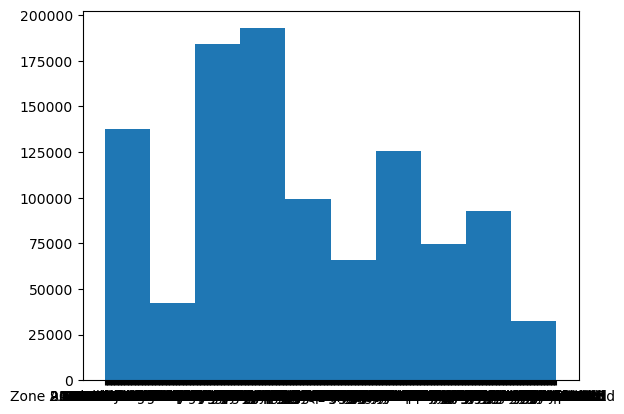

In [37]:
plt.hist((data.StopName))

(array([1.019144e+06, 2.427600e+04, 3.834000e+03, 8.800000e+02,
        2.430000e+02, 1.100000e+02, 5.000000e+01, 2.500000e+01,
        1.100000e+01, 2.000000e+00]),
 array([  1. ,  20.2,  39.4,  58.6,  77.8,  97. , 116.2, 135.4, 154.6,
        173.8, 193. ]),
 <BarContainer object of 10 artists>)

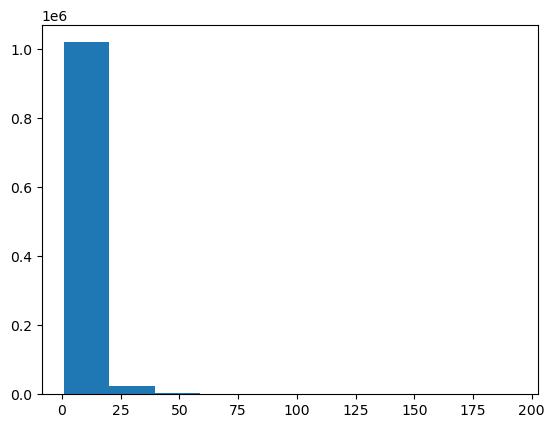

In [38]:
plt.hist((data.NumberOfBoardings))

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [40]:
models=[data]
print(models.append(Ridge()))

None


In [41]:
models=[data]
print(models.append(Lasso()))

None


In [42]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [43]:
models=[data]
print(models.append(KNeighborsRegressor()))

None


In [44]:
models=[data]
print(models.append(SVR()))

None


In [45]:
data.nunique()

TripID               3299
RouteID                36
StopID                969
StopName              583
WeekBeginning          54
NumberOfBoardings     156
dtype: int64